# **Clustering K-MEANS & PCA (Dimensionality Reduction) on IRIS**
**CASE: Clustering Iris Species (Unsupervised)**<BR>
**METHOD: K-Means and PCA**
<br>
> NIM/Nama:  **247056002 - Plipus Telaumbanua** <br>
> Mata Kuliah:  **DSC 5201 Machine Learning** <p>

*Magister of Data Science & Artificial Intelligence Universitas Sumatera Utara - Copyright@2025 - With All Reserved*


# **DAFTAR ISI:**


**1. DATA PREPARATION AND STRUCTURE**
- 1.1 Struktur Data (`head`, `tail`, `info`, `columns`, `shape`)

**2. ANALISIS STATISTIK DESKRIPTIF**
- 2.1 Statistik Deskriptif (`describe`)
- 2.2 Outliers (Visualisasi Boxplot)
- 2.3 Feature Correlation (Pearson Correlation)
- 2.4 Variance Analysis

**3. DATA PREPROCESSING**
- 3.1 Drop Kolom 'Target' (Unsupervised) & Standardization (`StandardScaler`)
- 3.2 Cek & Tangani Missing Values

4. K-MEANS CLUSTERING (k=3)
- 4.1 Visualisasi KMeans Tanpa PCA (Pairplot antar Fitur)
- 4.2 KMeans dengan PCA (Visualisasi Klaster)
- 4.3 Evaluasi Metrik (Inertia & Silhouette Score)
- 4.4 Penentuan Nilai k Optimal (Metode Elbow)

**5. PCA (PRINCIPAL COMPONENT ANALYSIS)**
- 5.1 Reduksi Dimensi Menjadi 2 Fitur
- 5.2 Variance Ratio per Komponen
- 5.3 Visualisasi PCA 2D & 3D Berdasarkan Label Asli
- 5.4 Perbandingan PCA vs t-SNE

# **1. DATA PREPATION & STRUCTURE**
> * Sumber data diambil dari IRIS [https://scikit-learn.org/1.4/auto_examples/datasets/plot_iris_dataset.html](https:/scikit-learn.org/1.4/auto_examples/datasets/plot_iris_dataset.html)
> * **Objective**: Untuk clusterisasi tipe bunga iris secara `unsupervised` (tanpa label yang sudah diketahui) berdasarkan morfologis kemiripan panjang sepal (`sepal length`), lebar sepal (`sepal width`), panjang petal (`petal length`), lebar petal (`petal width`)

In [120]:
from sklearn.datasets import load_iris #-- Import dataet iris dari sklearn.datasets
import pandas as pd

# Muat dataset Iris
iris = load_iris()

# Ubah ke DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

>**1.1 STRUKTUR DATA**<br>
>  Menampilkan 5 data pertama

In [121]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


> **Deskripsi:** <br>
*   Menampilkan 5 data pertama, pada `dataset IRIS` terdiri dari 4 fitur panjang dan lebar masing kelopak bunga (`sepal`) dan mahkota bunga (`tepal`). Dan target class bunga ***iris sentosa, iris versicolor dan iris virginica*** dalam clasifikasi biner

In [122]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [123]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [124]:
df.shape

(150, 5)

> **Jumlah Fitur:** <br>
> Secara default, dataset terdiri dari **150 instances** dan **4 fitur** dan **1 target class.**

In [125]:
df['target'].value_counts()

,count
target,
0,50
1,50
2,50


# **2. ANALISIS STATISTIK DESRIPTIVE**


>**2.1 STATISIK DESCIPTIVE**<br>
>  Analisis statistik deskriptif pada dataset `Iris` bertujuan untuk memahami distribusi, sebaran, dan karakteristik masing-masing fitur seperti sepal dan petal.

In [126]:
# Statistik deskriptif dasar
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


> **Analisis:**
> * Petal `length` dan `petal` width memiliki standar deviasi tertinggi `(1.76 dan 0.76)`, menunjukkan peran kunci dalam memisahkan `spesies Iris.`
> * Sepal width memiliki distribusi sempit dan cenderung simetris, kurang efektif sebagai fitur pemisah.
> * Rentang `petal length (1.0–6.9 cm)` menunjukkan kemungkinan multiklas yang jelas—fitur ini sangat diskriminatif.
> * `Target label (0,1,2)` terdistribusi seimbang, memungkinkan evaluasi model tanpa bias kelas.
> * Tidak ditemukan anomali ekstrem dari nilai min, max, dan kuartil → data siap untuk modelisasi.

> **2.2 OUTLIERS (BOXPLOT)**<br>
> Mengidentifikasi nilai-nilai ekstrem yang secara statistik berada di luar distribusi normal data (di luar 1.5 IQR pada boxplot). Outlier tsb dapat mempengaruhi rata-rata, standar deviasi, dan hasil model machine learning, sehingga penting dideteksi sejak awal agar keputusan preprocessing (seperti normalisasi atau transformasi) lebih tepat.

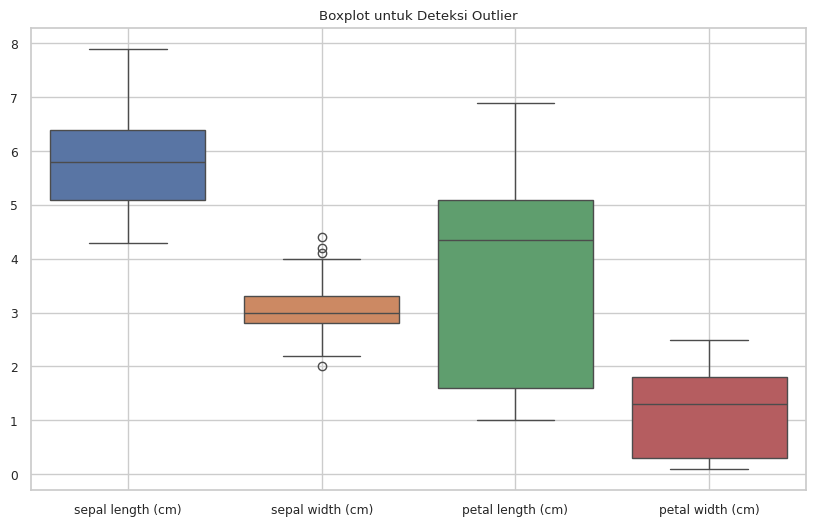

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns='target'))
plt.title("Boxplot untuk Deteksi Outlier")
plt.grid(True)
plt.show()

> **Analisis:**<br>
> Dari visualisasi `boxplot`, hanya fitur `sepal width` yang menunjukkan keberadaan `outlier`. Fitur `petal length` dan` petal width` memiliki sebaran nilai yang luas, menandakan peran pentingnya dalam pemisahan spesies. Secara keseluruhan, tidak ditemukan `outlie`r ekstrem yang mengganggu struktur data.

> **2.3 FEATURE CORRELATION (PEARSON CORRELATION)**<br>
> * Mengetahui hubungan linear antar fitur.
> * Mendeteksi fitur yang sangat berkaitan (redundansi).
> * Dasar pengambilan keputusan untuk PCA atau seleksi fitur.

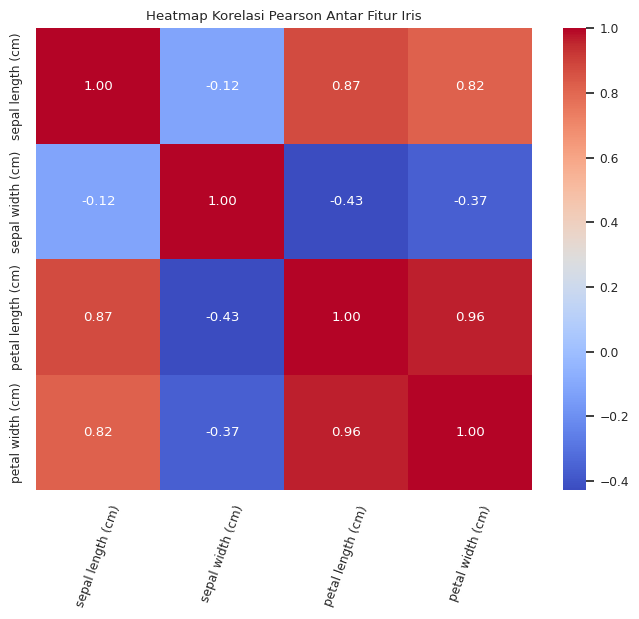

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung matriks korelasi antar fitur numerik (Pearson default)
corr_matrix = df.drop(columns='target').corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Pearson Antar Fitur Iris")
plt.xticks(rotation=70)
plt.show()


> **Analysis:**
> * *Petal length & petal width* → korelasi sangat kuat *(r = 0.96)*
→ Menunjukkan bahwa keduanya tumbuh proporsional, dan mungkin redundan secara informasi.
> * *Sepal length & petal length* → *korelasi tinggi (r = 0.87)*
→ Ada hubungan linear kuat → sepal length juga bisa relevan untuk memisah spesies.
> *  *Sepal width* berkorelasi **negatif** dengan semua fitur lainnya
→ Nilai korelasi rendah hingga sedang *(r = -0.12 hingga -0.43)*, artinya cenderung independen → bisa memberi informasi tambahan unik.
> * *Sepal length & petal width* juga menunjukkan korelasi kuat *(r = 0.82)*
→ Fitur ini turut andil dalam klasifikasi atau clustering.<P>

> **Kesimpulan:**
Semua fitur hampir memiliki korelasi yang kuat dimana `Petal length` dan `petal width` memiliki korelasi paling kuat, menunjukkan bahwa dimensi petal adalah fitur paling dominan dalam membedakan spesies Iris.

> **2.4 VARIANCE ANALYSIS:**<br>
Mengetahui fitur mana yang menyumbang informasi terbesar (varians tertinggi).

In [129]:
df.var()


,0
sepal length (cm),0.685694
sepal width (cm),0.189979
petal length (cm),3.116278
petal width (cm),0.581006
target,0.671141


> **Analysis:**
> * Petal length punya varians tertinggi (3.12) → fitur paling bervariasi dan informatif.
> * Sepal width variansnya paling kecil (0.19) → kontribusi informasi rendah.
> * Sepal length dan petal width punya varians sedang → cukup relevan.
> * Target variansnya menunjukkan distribusi kelas yang seimbang.
<br>
Singkatnya, petal length adalah fitur paling dominan untuk klasifikasi atau clustering.

# **3. DATA PREPROCESSING**
> * Data preprocessing pada kasus ini melibatkan tahapan berupa `Data Transformation` StandardScaler dan dropping `Target Class` karena tujuannya adalah untuk klasterisasi (unsupervised)


> **3.1 DROP 'TARGET' COLUM (UNSUPERVISED)**<P>
> Drop Target Class and Standardization

In [130]:
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Muat dataset Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# 2. Drop kolom target (unsupervised learning)
X = df.drop(columns=['target'])

# 3. Buat pipeline untuk StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# 4. Transformasi data dengan pipeline
X_scaled = pipeline.fit_transform(X)

# 5. Ubah ke DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 6. Tampilkan hasil akhir dataset
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [131]:
Pipeline(steps=[('scaler', StandardScaler())])

Pipeline(steps=[('scaler', StandardScaler())])

>**3.2 MISSING VALUES**<br>
>  Memeriksa apakah pada dataset iris terhadap missing values. Imputer akan dilakukan jika terdapat missing values.

In [132]:
df[df.isin(['?']).any(axis=1)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target


# **4. K-MEANS (k=3)**
> Implementasi klasterisasi **K-Means** bertujuan untuk mengelompokkan data ke dalam 3 grup berdasarkan kemiripan fitur tanpa menggunakan label, dan melihat apakah pembagian klaster mendekati label asli (target).
> * Penentuan nilai centroid 'k'
> * Clasterization
> * Optimium 'k' using Elbow Method
> * Visualisasi
> * Metrik evaluasi


>**4.1 K-MEANS (TANPA PCA) VISUALISASI -> FEATURE PAIR PLOTS**<br>
>  Memeriksa apakah pada dataset iris terhadap missing values. Imputer akan dilakukan jika terdapat missing values.

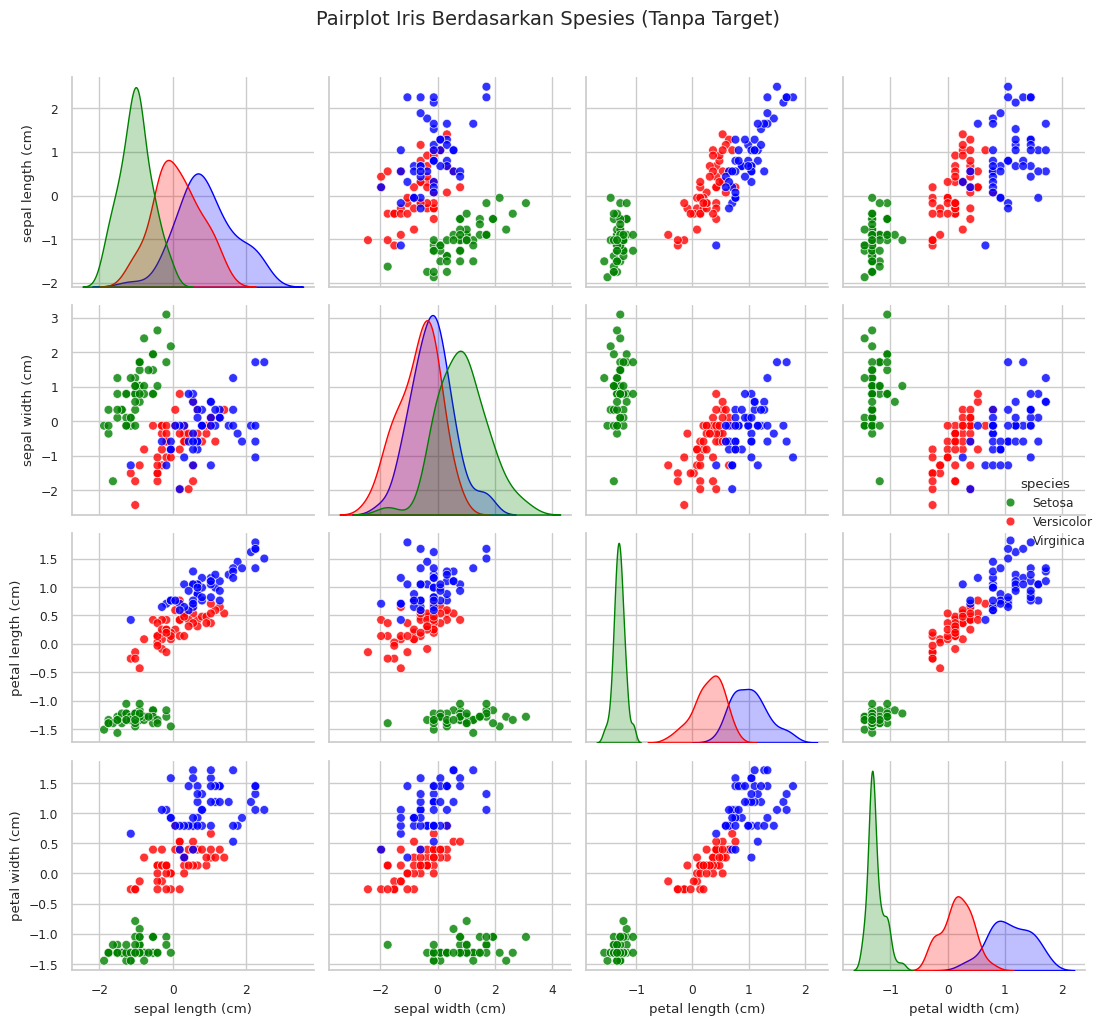

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

'''
Gabungkan df_scaled dengan target asli untuk Mapping target ke nama spesies
'''
df_pair = df_scaled.copy()
df_pair['target'] = df['target']

species_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df_pair['species'] = df_pair['target'].map(species_map)

# Hapus kolom target agar tidak ikut diplot
df_pair = df_pair.drop(columns=['target'])

# Warna untuk setiap spesies
palette = {'Setosa': 'green', 'Versicolor': 'red', 'Virginica': 'blue'}

# Pairplot hanya pada fitur numerik + hue='species'
sns.set(style='whitegrid', font_scale=0.8)
pair = sns.pairplot(
    df_pair,
    hue='species',
    palette=palette,
    diag_kind='kde',
    plot_kws={'s': 40, 'alpha': 0.8},
    height=2.5
)

# Judul
pair.fig.suptitle("Pairplot Iris Berdasarkan Spesies (Tanpa Target)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


> **ANALYSIS:**<br>
>Visualisasi pairplot menampilkan distribusi dan hubungan antar fitur Iris setelah standardisasi, dibedakan berdasarkan label target (`Setosa`, `Versicolor`, `Virginica`). Ketika dibandingkan dengan hasil KMeans clustering (k=3) dan korelasi fitur Pearson, dapat disimpulkan hal-hal penting berikut:
>* `Petal Length` dan `Petal Width` adalah fitur paling berpengaruh dalam pembentukan klaster.
Hal ini didukung oleh korelasi sangat tinggi antara keduanya (r = 0.96). Dalam pairplot, terlihat pemisahan klaster yang paling jelas pada fitur ini, terutama memisahkan `Setosa (target 0)` dari dua spesies lainnya.
>* Klaster KMeans cenderung mengikuti pola korelasi fitur.
Fitur `Petal Length` berkorelasi tinggi dengan `Sepal Length (r = 0.87)` dan `Petal Width (r = 0.96)`, sehingga kombinasi fitur-fitur ini secara tidak langsung membentuk batas alami antar klaster. Ini menjelaskan mengapa KMeans berhasil mendeteksi 3 klaster yang cukup sesuai dengan label asli.
>* `Setosa (target 0)` membentuk klaster tersendiri karena nilai petal-nya jauh lebih kecil dibandingkan `Versicolor` dan `Virginica`, terlihat sangat kontras pada distribusi KDE dan scatter-nya.
Hal ini konsisten dengan hasil KMeans di mana `Setosa` hampir selalu terpisah bersih ke dalam satu klaster.
>* `Sepal Width` memiliki korelasi negatif terhadap fitur-fitur `petal (r = –0.43` ke `Petal Length, r = –0.37 ke Petal Width)`, yang membuatnya kurang efektif dalam membentuk klaster yang jelas. Dalam pairplot, nilai-nilai sepal width antar spesies lebih tumpang tindih, menyebabkan penyumbangan yang kecil terhadap hasil klastering.
>* `Virginica` dan `Versicolor` tumpang tindih pada beberapa dimensi, khususnya pada `Sepal Length` dan `Sepal Width`, namun lebih terpisah saat dilihat dari `Petal Width` dan `Petal Length`. Maka, meskipun KMeans dapat membagi mereka ke dalam dua klaster tambahan, terdapat beberapa kesalahan (mis-cluster) karena overlap pada fitur yang kurang diskriminatif.

>**KESIMPULAN:**<br>
Hasil clustering KMeans pada data Iris sangat dipengaruhi oleh fitur-fitur dengan korelasi kuat seperti Petal Length dan Petal Width. Pairplot memperjelas bahwa fitur-fitur dengan korelasi tinggi membantu pembentukan klaster yang akurat, sedangkan fitur dengan korelasi rendah (seperti Sepal Width) memiliki kontribusi yang lebih lemah terhadap struktur klaster.







>**4.2 K-MEANS WITH PCA**

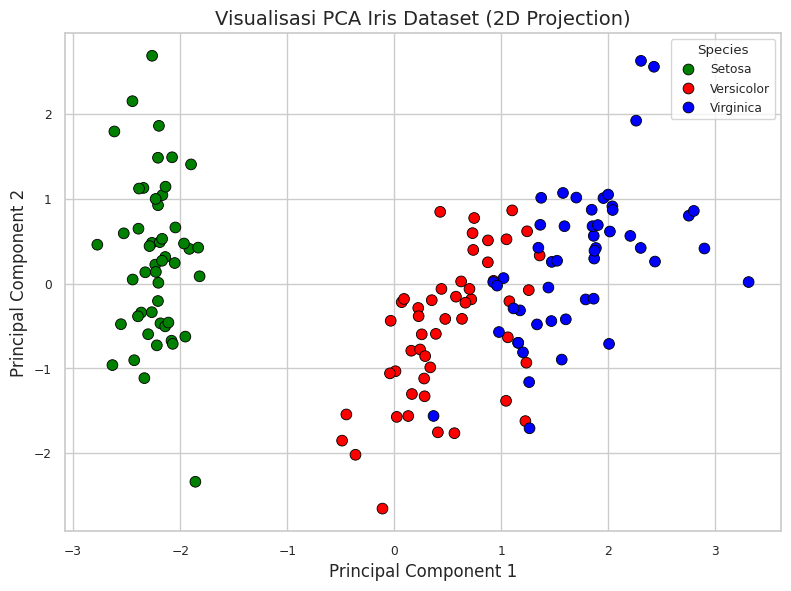

In [140]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumsikan df_scaled dan df['target'] sudah tersedia
# Gabungkan df_scaled dan target untuk visualisasi
df_pca_vis = df_scaled.copy()
df_pca_vis['target'] = df['target']

# PCA untuk reduksi menjadi 2 dimensi
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)
df_pca_vis['PC1'] = pca_components[:, 0]
df_pca_vis['PC2'] = pca_components[:, 1]

# Mapping label target ke nama spesies
species_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df_pca_vis['species'] = df_pca_vis['target'].map(species_map)

# Plot visualisasi PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_pca_vis,
    x='PC1',
    y='PC2',
    hue='species',
    palette={'Setosa': 'green', 'Versicolor': 'red', 'Virginica': 'blue'},
    s=60,
    edgecolor='black'
)
plt.title("Visualisasi PCA Iris Dataset (2D Projection)", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.grid(True)
plt.legend(title='Species')
plt.tight_layout()
plt.show()


> **ANALYSIS:**<br>
>* **Visualisasi PCA** Iris Dataset (2D Projection) menunjukkan bahwa dua komponen utama (Principal Component 1 dan 2) mampu memisahkan ketiga spesies bunga secara cukup baik. Terlihat bahwa:
>* **Setosa (hijau)** membentuk klaster yang sangat terpisah di sisi kiri (PC1 < -1.0), mencerminkan bahwa fitur-fitur seperti panjang dan lebar petal memiliki nilai yang sangat berbeda dibanding dua spesies lainnya, sesuai dengan korelasi tinggi antara `petal length` dan `petal width (r = 0.96).`
>* **Versicolor (merah)** dan Virginica (biru) cenderung memiliki area yang berdekatan, namun tetap membentuk dua klaster berbeda, dengan `Virginica` sedikit lebih menyebar di sisi kanan. Hal ini konsisten dengan hasil korelasi yang menunjukkan hubungan kuat antara `sepal length` dan `petal length (r = 0.87).`
>* Pemisahan ini juga sejalan dengan hasil KMeans sebelumnya, di mana tiga klaster terbentuk cukup baik dan sesuai dengan distribusi label aslinya.
>* Secara keseluruhan, PCA membantu mereduksi dimensi tanpa kehilangan struktur klaster yang penting dalam data, sekaligus mendukung kekuatan fitur `petal length` dan `petal width` sebagai pemisah utama antar spesies.

>**4.3 METRIK EVALUATION**<br>
> `Inertia` dan `Silhouette Score`

In [143]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Terapkan KMeans pada data yang sudah dinormalisasi
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

# Evaluasi menggunakan Inertia dan Silhouette Score
inertia = float(kmeans.inertia_)
sil_score = float(silhouette_score(df_scaled, kmeans.labels_))

inertia, sil_score


(191.02473685317958, 0.4798814508199817)

>**INTERPRESTASI:**
>* `Inertia` sebesar `191.02` menunjukkan total jarak kuadrat antara setiap titik dan pusat klasternya masih relatif tinggi, menandakan adanya penyebaran data yang cukup besar dalam klaster—umum terjadi pada data berdimensi tinggi seperti Iris.
>* `Silhouette Score` sebesar 0.48 menandakan bahwa struktur klaster cukup baik: tiap data cenderung lebih dekat ke klaster sendiri dibanding ke klaster lain. Meskipun belum sempurna `(ideal > 0.5)`, hasil ini menunjukkan bahwa KMeans dengan `k=3` mampu menangkap pola alami dalam data.

>**4.4 ELBOW METHOD (OPTIMUM K)**<br>

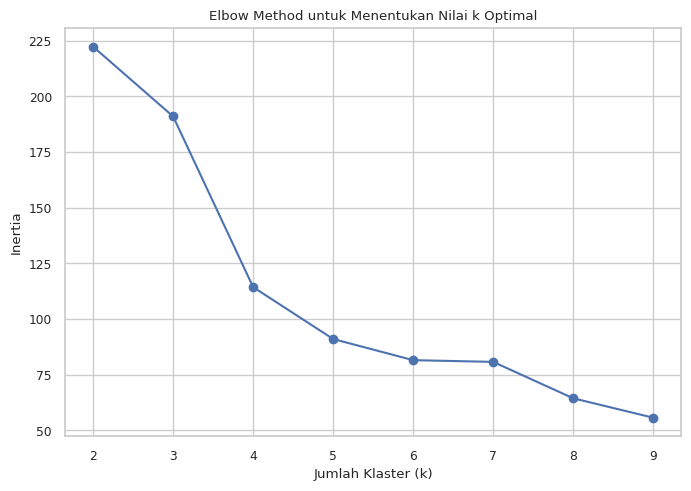

In [145]:
import matplotlib.pyplot as plt

# Uji nilai k dari 2 hingga 5
inertias = []
k_values = range(2, 10)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    inertias.append(km.inertia_)

# Plot Elbow
plt.figure(figsize=(7, 5))
plt.plot(k_values, inertias, marker='o', linestyle='-')
plt.title("Elbow Method untuk Menentukan Nilai k Optimal")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()


> **ANALYSIS ELBOW METHOD (k = 2–5)**<br>
> Dari grafik **Elbow** di atas, tampak bahwa nilai **inertia** menurun tajam dari **k = 2** ke **k = 3**, kemudian penurunannya mulai melandai setelah **k = 3**. Titik siku (elbow) yang paling jelas berada di **k = 3**, yang menandakan bahwa 3 klaster adalah jumlah optimal. Ini sejalan dengan struktur alami dataset Iris yang memang memiliki tiga spesies berbeda: `Setosa`, `Versicolor`, dan `Virginica`.

# **5. PCA (Principle Componenet Analysis)**

**5.1 REDUKSI 2 FITUR**

In [149]:
from sklearn.decomposition import PCA
import pandas as pd

# Langkah 1: Terapkan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Langkah 2: Simpan hasil ke dalam DataFrame
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Opsional: Lihat 5 data pertama
df_pca.head()


,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


>**INTERPRETASI:**<br>
> Hasil PCA menunjukkan bahwa setiap data kini direpresentasikan dalam dua dimensi utama: PC1 dan PC2, yang merupakan kombinasi linear dari fitur asli (sepal & petal). Nilai-nilai ini memuat informasi paling signifikan dalam variansi data—misalnya, baris pertama memiliki nilai PC1 = -2.26 dan PC2 = 0.48, yang berarti titik ini lebih dominan dipengaruhi oleh komponen utama pertama.

In [ ]:
# Tampilkan rasio varian yang dijelaskan oleh masing-masing komponen
variance_ratio = pca.explained_variance_ratio_

# Cetak hasilnya
for i, ratio in enumerate(variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f} ({ratio*100:.2f}%) dari total varian")


Principal Component 1: 0.7296 (72.96%) dari total varian
Principal Component 2: 0.2285 (22.85%) dari total varian


**5.2 VARIANCE RATIO**
> Variance ratio bertujuan untuk menunjukkan proporsi variabilitas data yang dijelaskan oleh setiap principal component, sehingga membantu menentukan jumlah komponen yang optimal.

In [151]:
from sklearn.decomposition import PCA

# Terapkan PCA
pca = PCA(n_components=2)
pca.fit(df_scaled)

# Tampilkan explained variance ratio
print(" Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.72962445 0.22850762]


>**PENJELASAN:**<BR>
> Nilai Explained Variance Ratio [0.72962445, 0.22850762] berarti:
> * **PC1** menjelaskan sekitar **72.96%** dari total variasi dalam data.
> * **PC2** menjelaskan sekitar **22.85%** dari variasi.

Sehingga, total **95.81%** informasi dari data asli berhasil direpresentasikan hanya dengan 2 komponen utama, menjadikan PCA sangat efektif untuk reduksi dimensi dalam kasus ini.

**5.3 PCA 2D & 3D VISUALIZATION VS LABEL ASLI**

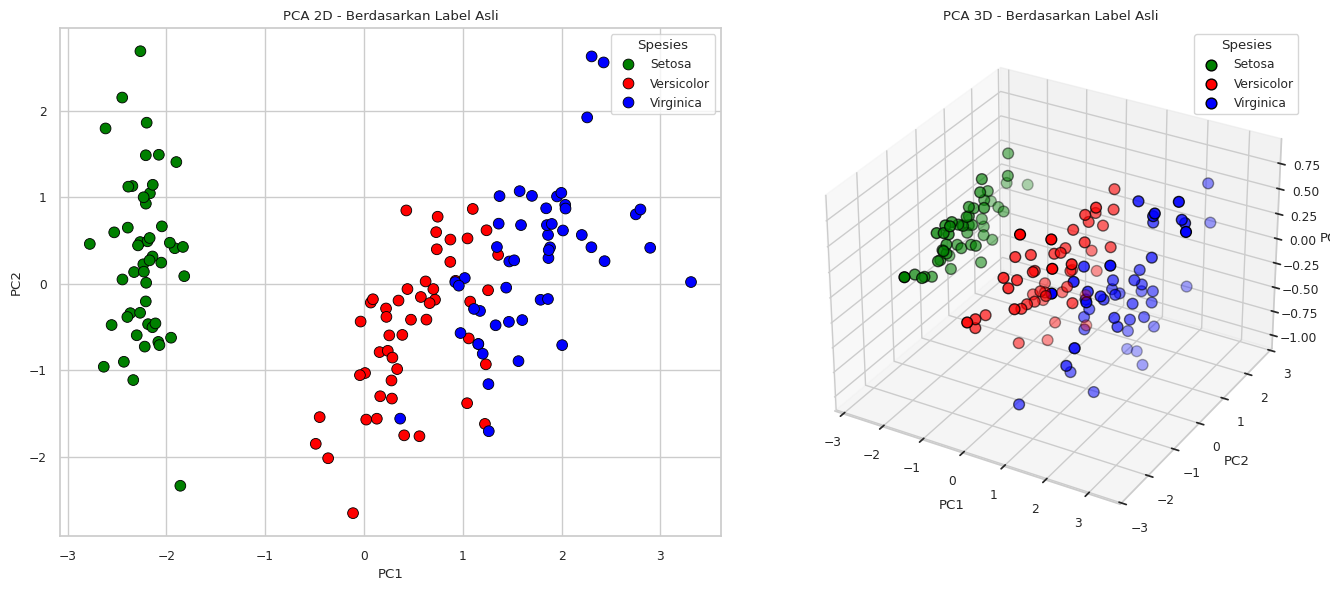

In [155]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# PCA 2D dan 3D
pca_2d = PCA(n_components=2).fit_transform(df_scaled)
pca_3d = PCA(n_components=3).fit_transform(df_scaled)

# Siapkan DataFrame untuk visualisasi
df_vis = pd.DataFrame(pca_2d, columns=['PC1', 'PC2'])
df_vis['PC3'] = pca_3d[:, 2]
df_vis['target'] = iris.target
df_vis['species'] = pd.Series(iris.target).map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Visualisasi 2D dan 3D dalam 1 baris 2 kolom
fig = plt.figure(figsize=(14, 6))

# Subplot 1: PCA 2D
ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(
    data=df_vis,
    x='PC1',
    y='PC2',
    hue='species',
    palette={'Setosa': 'green', 'Versicolor': 'red', 'Virginica': 'blue'},
    s=60,
    edgecolor='black',
    ax=ax1
)
ax1.set_title("PCA 2D - Berdasarkan Label Asli")
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.legend(title='Spesies')
ax1.grid(True)

# Subplot 2: PCA 3D
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
colors = {'Setosa': 'green', 'Versicolor': 'red', 'Virginica': 'blue'}
for species in df_vis['species'].unique():
    subset = df_vis[df_vis['species'] == species]
    ax2.scatter(subset['PC1'], subset['PC2'], subset['PC3'],
                label=species, color=colors[species], s=60, edgecolor='black')

ax2.set_title("PCA 3D - Berdasarkan Label Asli")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")
ax2.legend(title='Spesies')

plt.tight_layout()
plt.show()


>**ANALYSIS:**<BR>
> Label asli pada visualisasi tersebut ditunjukkan oleh warna titik-titik berdasarkan spesies bunga iris:
> * Hijau → Setosa (target = 0)
> * Merah → Versicolor (target = 1)
> * Biru → Virginica (target = 2)

> * Setosa (label 0) sangat terpisah dari dua spesies lain baik pada PCA 2D maupun 3D, yang menunjukkan bahwa fitur-fiturnya unik. Hal ini sesuai dengan nilai petal length dan width yang sangat kecil, serta korelasi tinggi antara petal length dan petal width (r = 0.96).

> * Versicolor (label 1) dan Virginica (label 2) memiliki area yang tumpang tindih, terutama pada PC2 dan PC3, menandakan kemiripan distribusi fitur. Namun, Virginica cenderung tersebar lebih lebar di sumbu PC1.

> * Variance PCA menunjukkan bahwa PC1 menjelaskan 72.96% dari variabilitas data dan PC2 menjelaskan 22.85%, sehingga kombinasi keduanya sudah menangkap sekitar 95.8% informasi dari seluruh fitur asli.

> * Keterpisahan klaster ini konsisten dengan hasil heatmap korelasi, di mana fitur petal length memiliki korelasi tinggi dengan sepal length (r = 0.87) dan petal width (r = 0.96), menjadikannya fitur dominan dalam pembentukan PC1.

> * Dengan demikian, visualisasi PCA berhasil memvalidasi bahwa Setosa mudah dipisahkan, sedangkan Versicolor dan Virginica memerlukan metode tambahan seperti klasifikasi supervised untuk hasil pemisahan yang optimal.

> **5.4 PCA vs T-SNE**

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


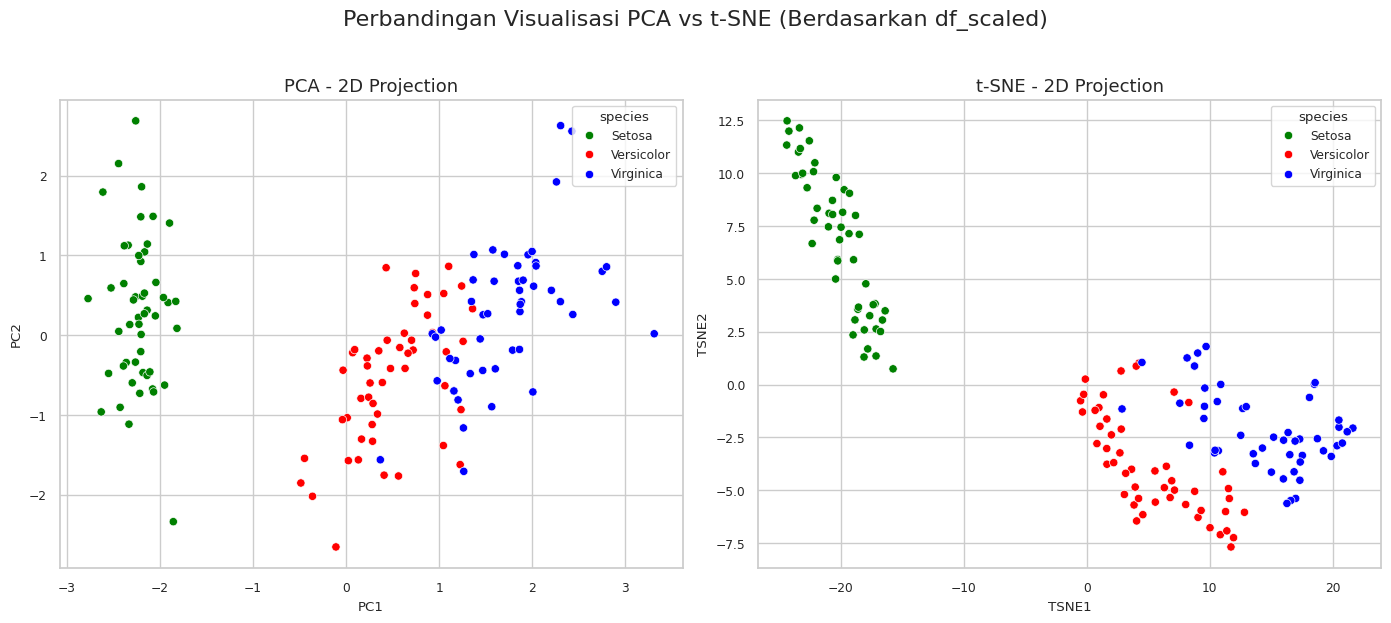

In [ ]:
# Gunakan df_scaled untuk perbandingan PCA dan t-SNE
from sklearn.manifold import TSNE

# PCA dari df_scaled
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# t-SNE dari df_scaled
tsne = TSNE(n_components=2, perplexity=20, n_iter=500, random_state=42)
X_tsne = tsne.fit_transform(df_scaled)

# Buat DataFrame untuk visualisasi
df_pca_vis = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca_vis['species'] = iris.target

df_tsne_vis = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne_vis['species'] = iris.target

# Mapping nama spesies
species_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df_pca_vis['species'] = df_pca_vis['species'].map(species_map)
df_tsne_vis['species'] = df_tsne_vis['species'].map(species_map)

# Visualisasi berdampingan
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_pca_vis, x='PC1', y='PC2', hue='species',
                palette={'Setosa': 'green', 'Versicolor': 'red', 'Virginica': 'blue'}, ax=axes[0])
axes[0].set_title("PCA - 2D Projection", fontsize=13)

sns.scatterplot(data=df_tsne_vis, x='TSNE1', y='TSNE2', hue='species',
                palette={'Setosa': 'green', 'Versicolor': 'red', 'Virginica': 'blue'}, ax=axes[1])
axes[1].set_title("t-SNE - 2D Projection", fontsize=13)

plt.suptitle("Perbandingan Visualisasi PCA vs t-SNE (Berdasarkan df_scaled)", fontsize=16, y=1.03)
plt.tight_layout()
plt.show()


**PERBANDINGAN PCA vs T-SNE:**<p>

* PCA (kiri) menampilkan distribusi data berdasarkan dua komponen utama yang menyumbang sekitar 95.81% variansi total (PC1: 72.96%, PC2: 22.85%). Hasilnya menunjukkan bahwa:

 * Setosa (hijau) terpisah sangat jelas dari dua spesies lain.
 * Versicolor (merah) dan Virginica (biru) saling tumpang tindih di area tengah, menandakan kesulitan pemisahan secara linear antar keduanya.

* t-SNE (kanan) menghasilkan pemisahan yang lebih tajam dan non-linear:
 * Ketiga spesies tampak membentuk klaster yang lebih padat dan tidak saling tumpang tindih.
 * Bahkan antara Versicolor dan Virginica yang sebelumnya tumpang tindih di PCA, kini lebih mudah dipisahkan dalam ruang 2D oleh t-SNE.

* Kesimpulan:
 * PCA cocok untuk reduksi dimensi dan interpretasi global berbasis variansi, namun terbatas pada pola linier.
 * t-SNE sangat efektif untuk mengungkap struktur lokal dan klaster alami dalam data, meski tidak mempertahankan hubungan global antar data.